In [119]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [120]:
train_data = pd.read_excel("Data_Train.xlsx")

In [121]:
train_data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [122]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [123]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [124]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [125]:
train_data.shape

(10683, 11)

In [126]:
train_data["Duration"]

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10683, dtype: object

In [127]:

train_data["Date_of_Journey"] = pd.to_datetime(train_data["Date_of_Journey"], errors="coerce", dayfirst=True)


train_data["Journey_day"] = train_data["Date_of_Journey"].dt.day
train_data["Journey_month"] = train_data["Date_of_Journey"].dt.month


In [128]:
train_data.drop(["Date_of_Journey"],axis = 1,inplace = True)

In [129]:
train_data[["Dep_hour","Dep_min"]]= train_data["Dep_Time"].str.split(":",expand =True)[[0,1]].astype(float)
train_data[["Dep_hour","Dep_min"]]= train_data[["Dep_hour","Dep_min"]].apply(pd.to_numeric,errors = "coerce")
train_data.drop(["Dep_Time"],axis =1,inplace = True)

In [130]:
duration = list(train_data["Duration"])


for i in range(len(duration)):
   
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + ' 0m'
      
        else:
            duration[i] = '0h ' + duration[i].strip()

# Initialize lists for hours and minutes
duration_hours = []
duration_mins = []

# Loop through the duration list to extract hours and minutes
for i in range(len(duration)):
    # Extract hours by splitting at 'h' and converting the first part to integer
    hours = int(duration[i].split('h')[0].strip())
    
    # Extract minutes by splitting at 'm' and converting the first part to integer
    minutes_part = duration[i].split('m')[0].split()[-1]  # Get part before 'm' and strip spaces
    minutes = 0  # Default value for minutes if not found
    if minutes_part.isdigit():  # Check if minutes part is a valid integer
        minutes = int(minutes_part)

    # Append the extracted values to the lists
    duration_hours.append(hours)
    duration_mins.append(minutes)

# Add hours and minutes back to the DataFrame
train_data['Hours'] = duration_hours
train_data['Minutes'] = duration_mins



     

    
   
 

 

  

  


   



In [131]:
train_data.drop(["Duration"],axis = 1,inplace = True)

In [132]:
train_data.head(3)

,Airline,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Hours,Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,non-stop,No info,3897,24,3,22.0,20.0,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,2 stops,No info,7662,1,5,5.0,50.0,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,2 stops,No info,13882,9,6,9.0,25.0,19,0


In [133]:
train_data["Arrival_hour"]= pd.to_datetime(train_data.Arrival_Time).dt.hour
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute
train_data.drop(["Arrival_Time"],axis = 1,inplace =True)

In [134]:
train_data.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Hours,Minutes,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22.0,20.0,2,50,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5.0,50.0,7,25,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9.0,25.0,19,0,4,25


In [135]:
# Handling categorical data:
# nominal data: data not in any order, one hot encoding use in this case
# Odinal data:  data are in order,label encoder use in this case 

In [136]:
train_data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [137]:
train_data = train_data[train_data["Airline"]!="Jet Airways "] 
train_data = train_data[~train_data["Airline"].str.contains("Jet Airways",case = False)]

In [138]:
train_data["Airline"].value_counts()

IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

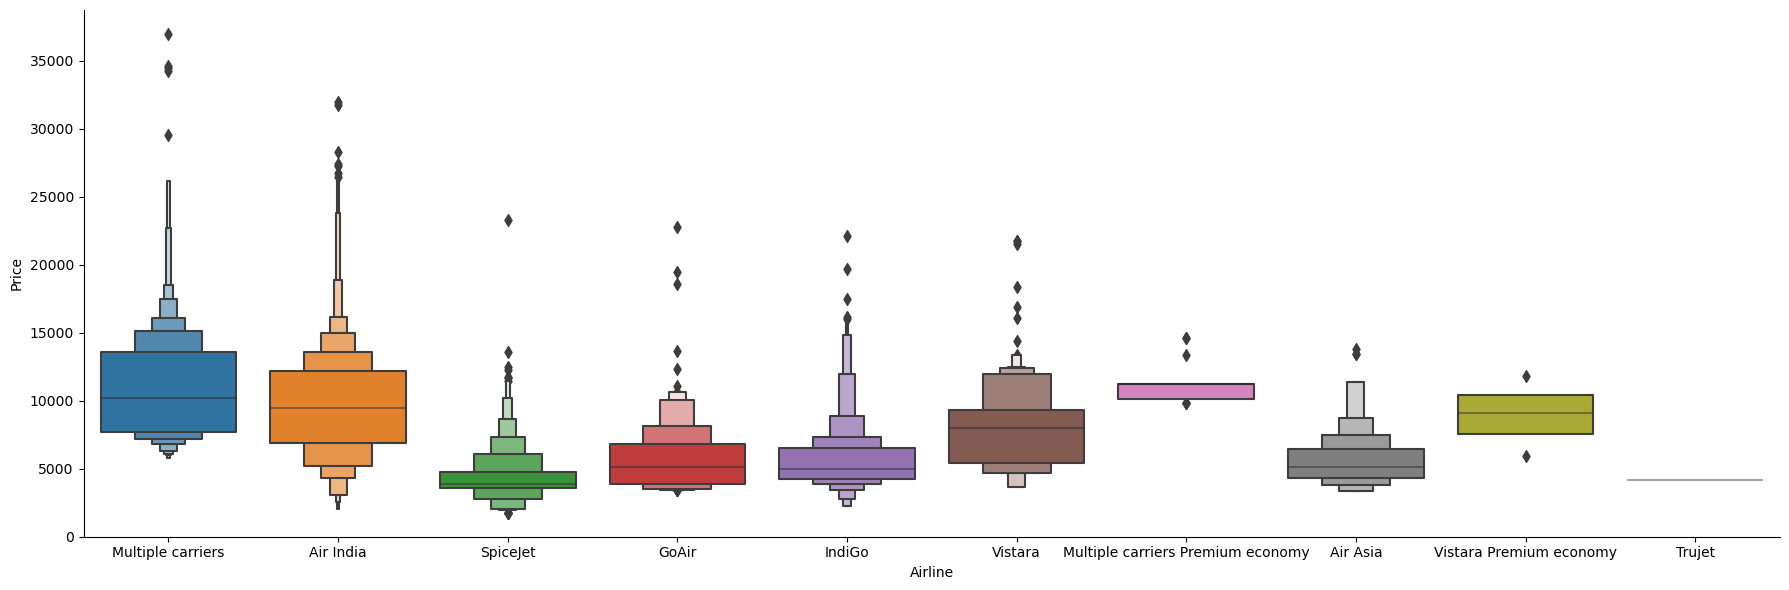

In [139]:
sns.catplot(y = "Price",x = "Airline",data = train_data.sort_values("Price",ascending = False),kind ="boxen",height =6,aspect = 3)

In [144]:
Airline = train_data[["Airline"]] 
Airline = pd.get_dummies(Airline,drop_first = True)

In [145]:
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0


In [146]:
train_data["Source"].value_counts()

Delhi       2949
Kolkata     1615
Banglore    1405
Mumbai       478
Chennai      381
Name: Source, dtype: int64

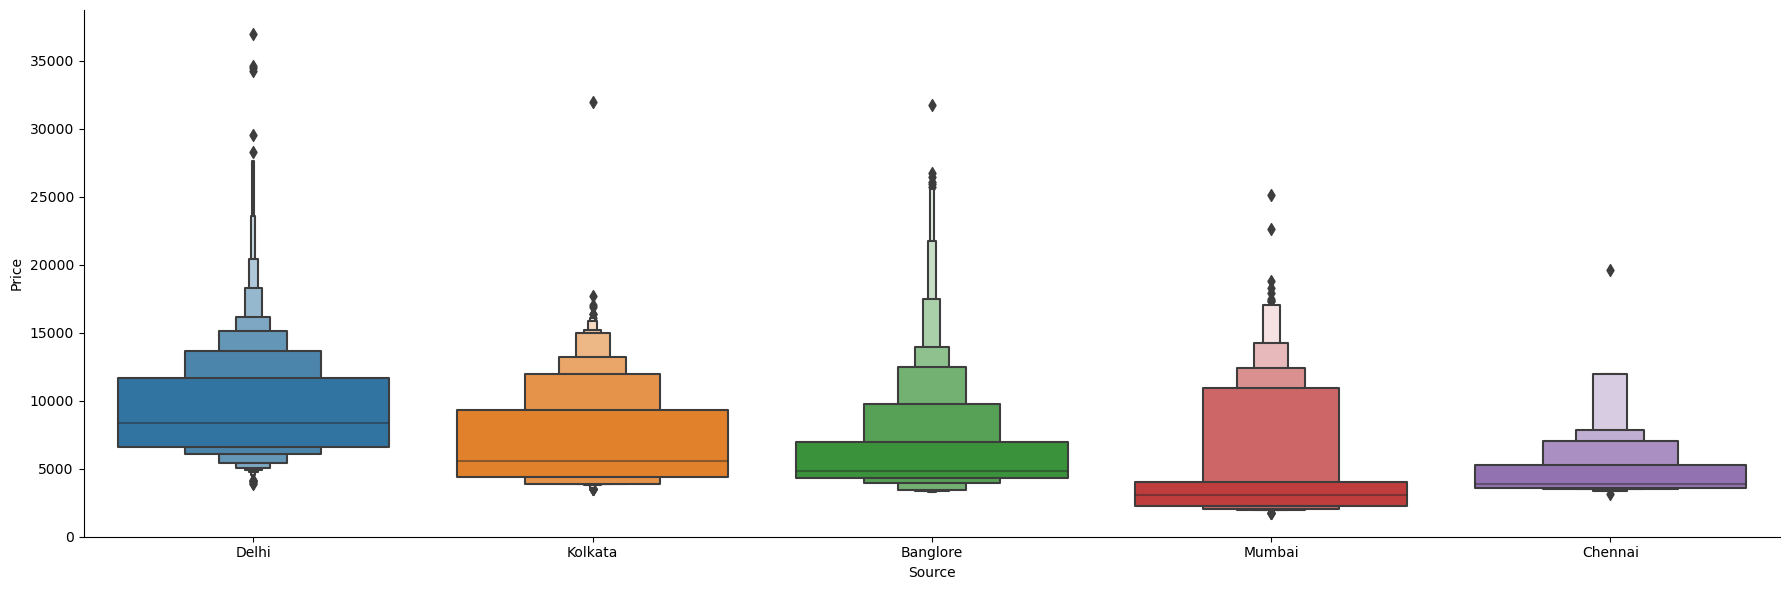

In [147]:
sns.catplot(y = "Price",x = "Source",data = train_data.sort_values("Price",ascending = False),kind ="boxen",height =6,aspect = 3) 

In [148]:
Source = train_data[["Source"]] 
Source = pd.get_dummies(Source,drop_first = True)

In [149]:
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
3,0,0,1,0
4,0,0,0,0
5,0,0,1,0


In [150]:
train_data["Destination"].value_counts()

Cochin       2949
Banglore     1615
Delhi         895
New Delhi     510
Hyderabad     478
Kolkata       381
Name: Destination, dtype: int64

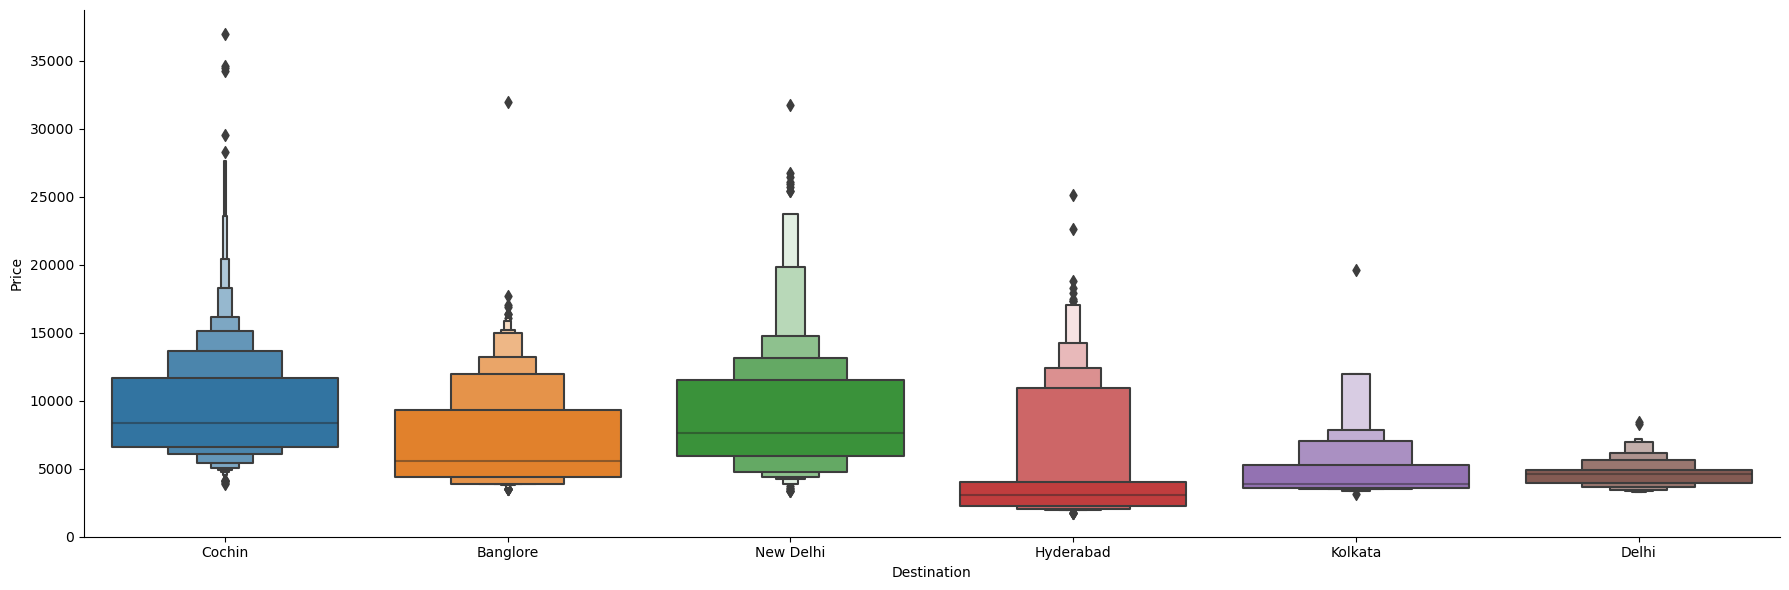

In [151]:
sns.catplot(y = "Price",x = "Destination",data = train_data.sort_values("Price",ascending = False),kind ="boxen",height =6,aspect = 3)

In [152]:
Destination = train_data[["Destination"]] 
Destination = pd.get_dummies(Destination,drop_first = True)

In [153]:
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
5,0,0,0,0,0


In [154]:
train_data["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
3              CCU → NAG → BLR
4              BLR → NAG → DEL
5                    CCU → BLR
                 ...          
10677                BLR → DEL
10678                CCU → BLR
10679                CCU → BLR
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 6828, dtype: object

In [155]:
train_data.drop(["Route","Additional_Info"],axis = 1,inplace = True)

In [156]:
train_data.head(3)

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Hours,Minutes,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22.0,20.0,2,50,1,10
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5.0,50.0,7,25,13,15
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18.0,5.0,5,25,23,30


In [157]:
train_data["Total_Stops"].value_counts()

1 stop      3086
non-stop    2868
2 stops      827
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [158]:
# Step 1: Strip whitespace and clean up the column
train_data["Total_Stops"] = train_data["Total_Stops"].str.strip()

# Step 2: Replace stop labels with numerical values
train_data["Total_Stops"].replace(
    {"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, 
    inplace=True
)

# Step 3: Handle missing values, if any, by filling with 0 or another appropriate value
train_data["Total_Stops"].fillna(0, inplace=True)

# Step 4: Convert to integers
train_data["Total_Stops"] = train_data["Total_Stops"].astype(int)

# Verify the output
train_data["Total_Stops"].head(4)


0    0
1    2
3    1
4    1
Name: Total_Stops, dtype: int32

In [162]:
train_data.head(3)

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Hours,Minutes,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22.0,20.0,2,50,1,10
1,Air India,Kolkata,Banglore,2,7662,1,5,5.0,50.0,7,25,13,15
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18.0,5.0,5,25,23,30


In [163]:
train_data1 =  pd.concat([train_data,Airline,Source, Destination],axis = 1)

In [164]:
train_data1.head(4)

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Hours,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22.0,20.0,2,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5.0,50.0,7,...,0,0,0,1,0,0,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18.0,5.0,5,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16.0,50.0,4,...,0,0,0,0,0,0,0,0,0,1


In [165]:
train_data1.drop(["Airline","Source","Destination"],axis = 1,inplace = True)

In [166]:
train_data1.head(4)

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Hours,Minutes,Arrival_hour,Arrival_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22.0,20.0,2,50,1,10,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5.0,50.0,7,25,13,15,...,0,0,0,1,0,0,0,0,0,0
3,1,6218,12,5,18.0,5.0,5,25,23,30,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16.0,50.0,4,45,21,35,...,0,0,0,0,0,0,0,0,0,1


In [167]:
train_data1.shape

(6828, 28)

In [47]:
test_data = pd.read_excel("Test_set.xlsx")

In [48]:
test_data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included


In [49]:
test_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [50]:
test_data.shape

(2671, 10)

In [51]:
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [52]:
test_data["Duration"].value_counts()

2h 50m     122
1h 30m     107
2h 45m      95
2h 55m      81
3h          72
          ... 
30h 45m      1
32h 5m       1
32h 20m      1
28h 55m      1
5m           1
Name: Duration, Length: 320, dtype: int64

In [53]:
test_data[["Journey_day","Journey_month"]]= test_data["Date_of_Journey"].str.split("/",expand = True)[[0,1]].astype(float)

In [54]:
test_data[["Journey_day","Journey_month"]] = test_data[["Journey_day","Journey_month"]].apply(pd.to_numeric,errors = "coerce")

In [55]:
test_data.drop(["Date_of_Journey"],axis = 1,inplace = True)

In [57]:
test_data[["Dep_hour","Dep_min"]]= test_data["Dep_Time"].str.split(":",expand =True)[[0,1]].astype(float)
test_data[["Dep_hour","Dep_min"]]= test_data[["Dep_hour","Dep_min"]].apply(pd.to_numeric,errors = "coerce")
test_data.drop(["Dep_Time"],axis =1,inplace = True)

In [58]:
duration = list(test_data["Duration"])


for i in range(len(duration)):
   
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + ' 0m'
      
        else:
            duration[i] = '0h ' + duration[i].strip()

# Initialize lists for hours and minutes
duration_hours = []
duration_mins = []

# Loop through the duration list to extract hours and minutes
for i in range(len(duration)):
    # Extract hours by splitting at 'h' and converting the first part to integer
    hours = int(duration[i].split('h')[0].strip())
    
    # Extract minutes by splitting at 'm' and converting the first part to integer
    minutes_part = duration[i].split('m')[0].split()[-1]  # Get part before 'm' and strip spaces
    minutes = 0  # Default value for minutes if not found
    if minutes_part.isdigit():  # Check if minutes part is a valid integer
        minutes = int(minutes_part)

    # Append the extracted values to the lists
    duration_hours.append(hours)
    duration_mins.append(minutes)

# Add hours and minutes back to the DataFrame
test_data['Hours'] = duration_hours
test_data['Minutes'] = duration_mins



     

    
   
 

 

  

  


In [59]:
test_data.drop(["Duration"],axis = 1,inplace = True)

In [60]:
test_data.head(3)

,Airline,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Hours,Minutes
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,1 stop,No info,6.0,6.0,17.0,30.0,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,1 stop,No info,12.0,5.0,6.0,20.0,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,1 stop,In-flight meal not included,21.0,5.0,19.0,15.0,23,45


In [62]:
test_data["Arrival_hour"]= pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"],axis = 1,inplace =True) 

In [63]:
test_data.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Hours,Minutes,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6.0,6.0,17.0,30.0,10,55,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12.0,5.0,6.0,20.0,4,0,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21.0,5.0,19.0,15.0,23,45,19,0


In [64]:
# Handling categorical data:
# nominal data: data not in any order, one hot encoding use in this case
# Odinal data:  data are in order,label encoder use in this case

In [68]:
test_data["Airline"].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

In [71]:
test_data = test_data[test_data["Airline"]!="Jet Airways "] 
test_data = test_data[~test_data["Airline"].str.contains("Jet Airways",case = False)]

In [72]:
test_data["Airline"].value_counts()

IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Name: Airline, dtype: int64

In [75]:
Airline = test_data[["Airline"]] 
Airline = pd.get_dummies(Airline,drop_first = True)

In [76]:
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
1,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0
7,0,0,1,0,0,0,0,0


In [77]:
test_data["Source"].value_counts()

Delhi       800
Kolkata     406
Banglore    355
Mumbai      136
Chennai      75
Name: Source, dtype: int64

In [78]:
Source = teat_data[["Source"]] 
Source = pd.get_dummies(Source,drop_first = True)

In [79]:
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
1,0,0,1,0
3,0,1,0,0
4,0,0,0,0
6,0,0,0,0
7,0,0,1,0


In [80]:
test_data["Destination"].value_counts()

Cochin       800
Banglore     406
Delhi        226
Hyderabad    136
New Delhi    129
Kolkata       75
Name: Destination, dtype: int64

In [82]:
Destination = test_data[["Destination"]] 
Destination = pd.get_dummies(Destination,drop_first = True)

In [83]:
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
1,0,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0
6,0,0,0,0,1
7,0,0,0,0,0


In [84]:
test_data.drop(["Route","Additional_Info"],axis = 1,inplace = True)

In [85]:
test_data.head(3)

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Hours,Minutes,Arrival_hour,Arrival_min
1,IndiGo,Kolkata,Banglore,1 stop,12.0,5.0,6.0,20.0,4,0,10,20
3,Multiple carriers,Delhi,Cochin,1 stop,21.0,5.0,8.0,0.0,13,0,21,0
4,Air Asia,Banglore,Delhi,non-stop,24.0,6.0,23.0,55.0,2,50,2,45


In [86]:
test_data["Total_Stops"].value_counts()

1 stop      828
non-stop    705
2 stops     227
3 stops      11
4 stops       1
Name: Total_Stops, dtype: int64

In [87]:
test_data["Total_Stops"] = test_data["Total_Stops"].str.strip()

# Step 2: Replace stop labels with numerical values
test_data["Total_Stops"].replace(
    {"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, 
    inplace=True
)

# Step 3: Handle missing values, if any, by filling with 0 or another appropriate value
test_data["Total_Stops"].fillna(0, inplace=True)

# Step 4: Convert to integers
test_data["Total_Stops"] = test_data["Total_Stops"].astype(int)

# Verify the output
test_data["Total_Stops"].head(4)


1    1
3    1
4    0
6    1
Name: Total_Stops, dtype: int32

In [88]:
test_data.head(3)

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Hours,Minutes,Arrival_hour,Arrival_min
1,IndiGo,Kolkata,Banglore,1,12.0,5.0,6.0,20.0,4,0,10,20
3,Multiple carriers,Delhi,Cochin,1,21.0,5.0,8.0,0.0,13,0,21,0
4,Air Asia,Banglore,Delhi,0,24.0,6.0,23.0,55.0,2,50,2,45


In [89]:
test_data1 = pd.concat([test_data,Airline,Source, Destination],axis = 1)

In [91]:
test_data1.drop(["Airline","Source","Destination"],axis = 1,inplace = True)

In [92]:
test_data1.head(3)

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Hours,Minutes,Arrival_hour,Arrival_min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
1,1,12.0,5.0,6.0,20.0,4,0,10,20,0,...,0,0,0,1,0,0,0,0,0,0
3,1,21.0,5.0,8.0,0.0,13,0,21,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24.0,6.0,23.0,55.0,2,50,2,45,0,...,0,0,0,0,0,0,1,0,0,0


In [93]:
test_data1.shape

(1772, 26)

# Feature selection:
## Heat map
## feature _importance
## selectkbest

In [168]:
train_data1.shape

(6828, 28)

In [169]:
train_data1.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Hours', 'Minutes', 'Arrival_hour', 'Arrival_min',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [170]:
x = train_data1.drop(["Price"],axis = 1)

In [172]:
x.head(3)

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Hours,Minutes,Arrival_hour,Arrival_min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22.0,20.0,2,50,1,10,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5.0,50.0,7,25,13,15,1,...,0,0,0,1,0,0,0,0,0,0
3,1,12,5,18.0,5.0,5,25,23,30,0,...,0,0,0,1,0,0,0,0,0,0


In [173]:
y = train_data1["Price"]

In [174]:
y.head(3)

0    3897
1    7662
3    6218
Name: Price, dtype: int64

C:\Users\abc\AppData\Local\Temp\ipykernel_5240\753436393.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(),annot = True,cmap = "RdYlGn")


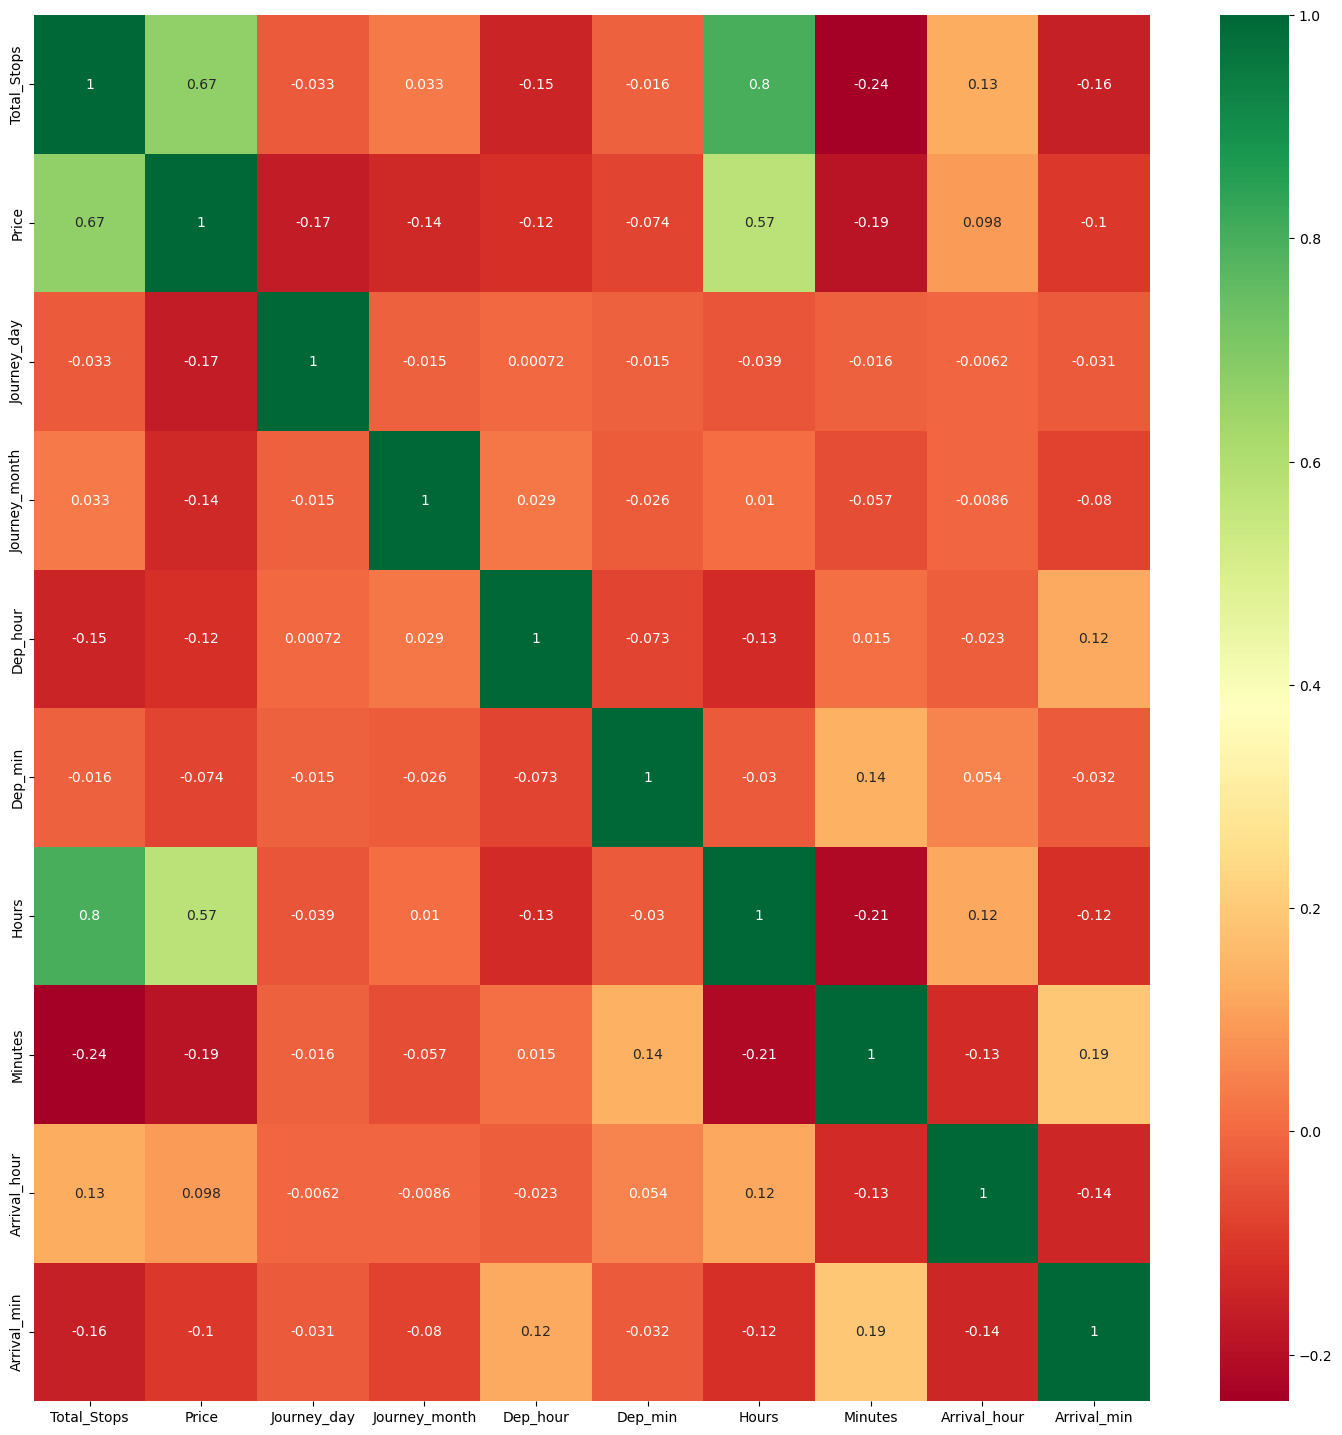

In [175]:
plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(),annot = True,cmap = "RdYlGn")
plt.show()

In [176]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x,y)

ExtraTreesRegressor()

In [178]:
selection.feature_importances_

array([2.60770374e-01, 1.21313329e-01, 7.34665959e-02, 3.30580283e-02,
       3.36219098e-02, 1.51654275e-01, 2.48688133e-02, 3.17146467e-02,
       2.72336155e-02, 3.87985195e-02, 3.77882144e-03, 2.57839211e-02,
       4.49538780e-02, 2.13495358e-03, 6.24961992e-03, 2.45357281e-04,
       1.28188871e-02, 2.05721094e-04, 1.00010874e-03, 3.56083908e-02,
       5.60569847e-03, 4.52388424e-03, 2.79528069e-02, 2.35962474e-03,
       4.37763439e-03, 1.23956696e-03, 2.46610180e-02])

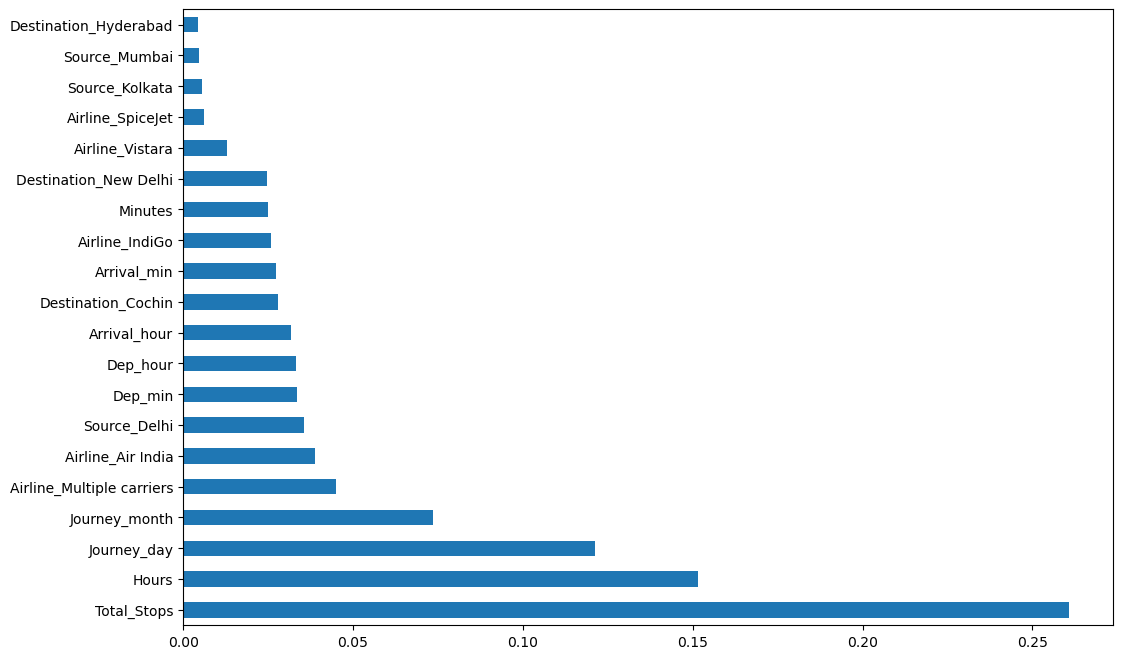

In [177]:
##plot graph of feature importances for better visualization:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_,index= x.columns)
feat_importances.nlargest(20).plot(kind = "barh")
plt.show()

In [179]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)


In [180]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train,y_train)

RandomForestRegressor()

In [182]:
y_pred = reg_rf.predict(x_test)

In [183]:
reg_rf.score(x_train,y_train)

0.9736962005035815

In [184]:
reg_rf.score(x_test,y_test)

0.8289071973264883

C:\Users\abc\AppData\Local\Temp\ipykernel_5240\3453123835.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


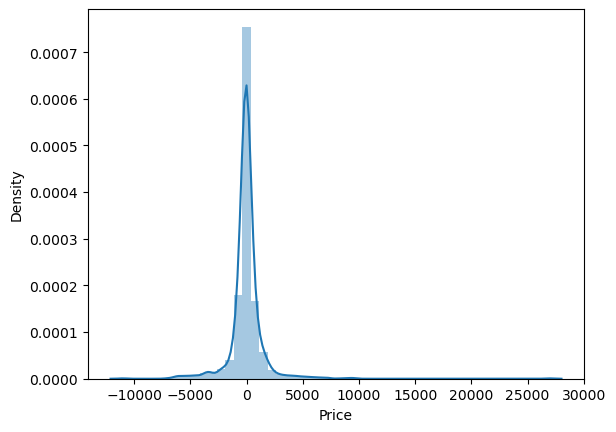

In [185]:
sns.distplot(y_test-y_pred)
plt.show()

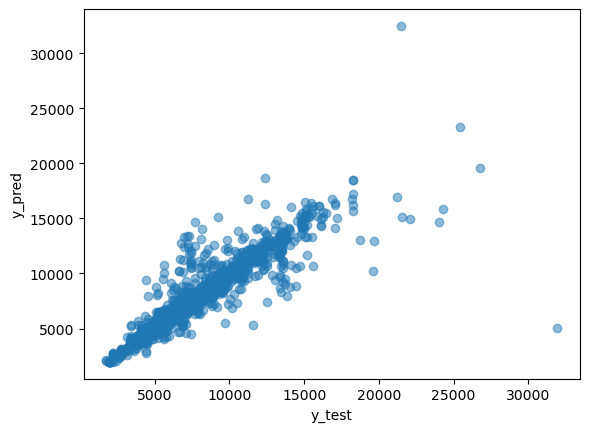

In [186]:
plt.scatter(y_test,y_pred,alpha = 0.5) 
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [187]:
from sklearn import metrics

In [190]:
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print("MSE:",metrics.mean_squared_error(y_test,y_pred) )
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 730.1677245129606
MSE: 2466227.343309127
RMSE: 1570.4226639058438


In [191]:
metrics.r2_score(y_test,y_pred)

0.8289071973264883

# Hyperparameter Tunning

In [193]:
from sklearn.model_selection import RandomizedSearchCV 
n_estimators = [int(x)for x in np.linspace(start = 100,stop = 1200,num =12)]
max_features = ["auto","sqrt"]
max_depth= [int(x)for x in np.linspace(5,30,num = 6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]


In [194]:
random_grid = {"n_estimators":n_estimators,"max_features":max_features,"max_depth":max_depth,"min_samples_split":min_samples_split,"min_samples_leaf":min_samples_leaf}

In [199]:
rf_random = RandomizedSearchCV(estimator = reg_rf,param_distributions= random_grid,scoring ="neg_mean_squared_error",n_iter = 10,cv =5,verbose =2,random_state =42,n_jobs =1)

In [200]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  15.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  16.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  14.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  15.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  14.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  25.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  27.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

C:\Users\abc\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\abc\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abc\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\abc\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\abc\anaconda3\Lib\site-packages\sklearn\ut

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [201]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [202]:
prediction = rf_random.predict(x_test)

C:\Users\abc\AppData\Local\Temp\ipykernel_5240\3865557949.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


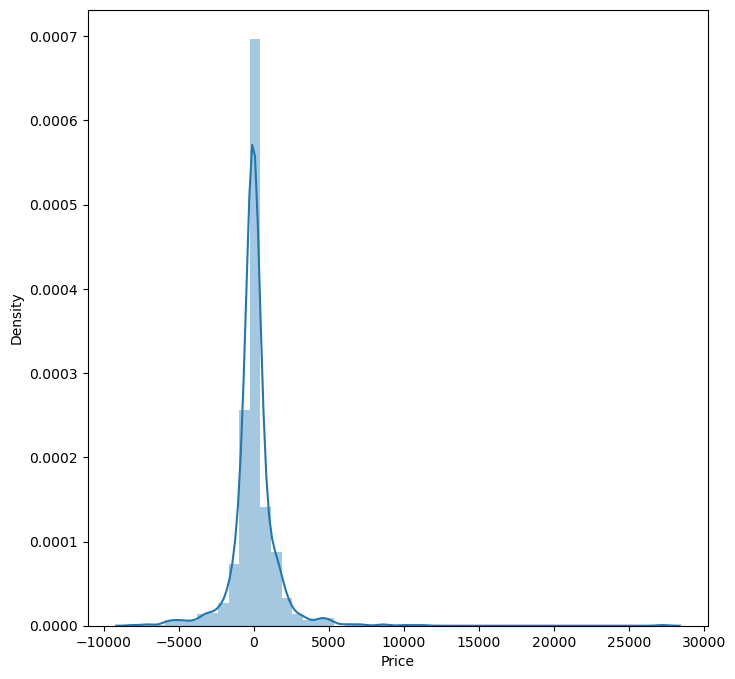

In [203]:
plt.figure(figsize=(8,8))
sns.distplot(y_test-prediction)
plt.show()

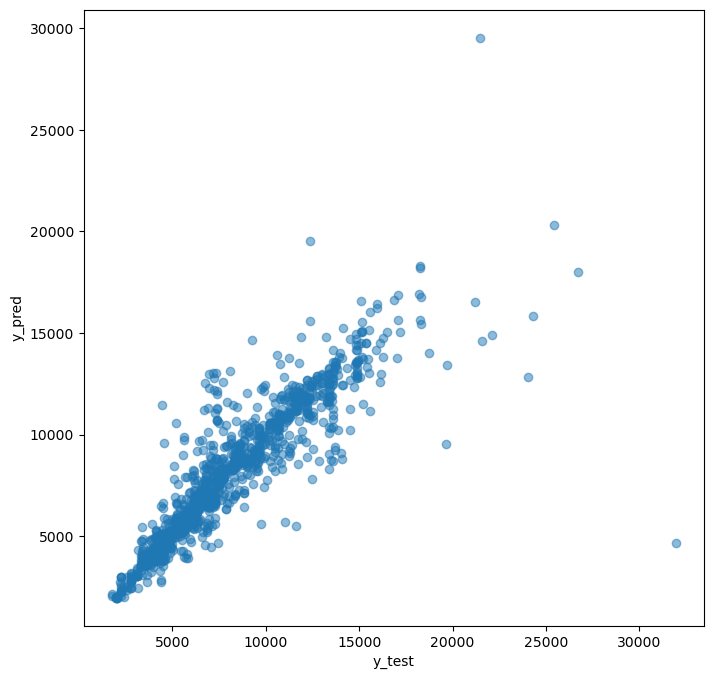

In [205]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,prediction,alpha = 0.5) 
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [206]:
print("MAE:",metrics.mean_absolute_error(y_test,prediction))
print("MSE:",metrics.mean_squared_error(y_test,prediction) )
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE: 802.0178654246962
MSE: 2579736.7413536077
RMSE: 1606.1558894931736


# save the model to reuse it again

In [210]:
import pickle
file = open("flight_rf.pkl","wb")
pickle.dump(rf_random,file)

OSError: [Errno 28] No space left on device